# Importar Librerías Necesarias
Importar las librerías necesarias

In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Cargar Conjunto de Datos
Cargar el conjunto de datos Global_Health_Statistics.csv en un DataFrame de pandas.

In [308]:
# Cargar el conjunto de datos Global_Health_Statistics.csv
df = pd.read_csv('/home/alumnadotarde/PIA/Proyecto_Analisis/Global_Health_Statistics.csv')

# Mostrar las primeras filas del DataFrame
df.head()

,Country,Year,Disease Name,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Population Affected,...,Hospital Beds per 1000,Treatment Type,Average Treatment Cost (USD),Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Improvement in 5 Years (%),Per Capita Income (USD),Education Index,Urbanization Rate (%)
0,Italy,2013,Malaria,Respiratory,0.95,1.55,8.42,0-18,Male,471007,...,7.58,Medication,21064,No,91.82,4493,2.16,16886,0.79,86.02
1,France,2002,Ebola,Parasitic,12.46,8.63,8.75,61+,Male,634318,...,5.11,Surgery,47851,Yes,76.65,2366,4.82,80639,0.74,45.52
2,Turkey,2015,COVID-19,Genetic,0.91,2.35,6.22,36-60,Male,154878,...,3.49,Vaccination,27834,Yes,98.55,41,5.81,12245,0.41,40.20
3,Indonesia,2011,Parkinson's Disease,Autoimmune,4.68,6.29,3.99,0-18,Other,446224,...,8.44,Surgery,144,Yes,67.35,3201,2.22,49336,0.49,58.47
4,Italy,2013,Tuberculosis,Genetic,0.83,13.59,7.01,61+,Male,472908,...,5.90,Medication,8908,Yes,50.06,2832,6.93,47701,0.50,48.14


# Acerca del dataset

Este conjunto de datos proporciona estadísticas completas sobre la salud global, centrándose en diversas enfermedades, tratamientos y resultados. Los datos abarcan múltiples países y años, el conjunto de datos incluye información sobre la prevalencia, incidencia y tasas de mortalidad de las principales enfermedades, así como la efectividad de los tratamientos y la infraestructura sanitaria.

## Casos de Uso del Conjunto de Datos

Este conjunto de datos puede ser utilizado para:

- **Análisis de Políticas de Salud**: Comprender qué enfermedades son más prevalentes y qué países requieren más inversión en infraestructura sanitaria.

- **Investigación en Salud Global**: Identificar regiones que necesitan intervenciones específicas o campañas de salud pública.

# Exploración Inicial de Datos

#### Lo primero que haremos sera borrar las columnas que no nos sirvan o sean redudantes a la hora de realizar mi analisis

- 'Disease Name':

    Razón para eliminar: El análisis se enfoca en categorías más amplias como 'Disease Category', el nombre específico de la enfermedad puede no aportar valor agregado al identificar patrones o tendencias.


- 'Population Affected':

    Razón para eliminar: Es redundante si a las tasas de prevalencia, incidencia y mortalidad, que son proporciones más útiles para comparar entre países con poblaciones muy diferentes.


- 'Average Treatment Cost (USD)':

    Razón para eliminar: Irrelevante si queremos no incluir un análisis financiero o si el costo no tiene una relación directa con las tasas de prevalencia o mortalidad.


- 'Improvement in 5 Years (%)':

    Razón para eliminar: No es relevante porque el análisis está más orientado a la situación actual y no a tendencias futuras o pasadas.


- 'Education Index':

    Razón para eliminar: Irrelevante para un análisis centrado más directamente en las tasas de prevalencia y acceso sanitario.
    

- 'Urbanization Rate (%)':

    Razon para eliminar: Tiene correlaciones muy bajas con la mayoría de las métricas de salud (prevalencia, incidencia, mortalidad).

In [309]:
# Eliminar las columnas especificadas
columnas_a_eliminar = ['Disease Name', 'Population Affected', 'Average Treatment Cost (USD)', 'Improvement in 5 Years (%)', 'Education Index', 'Urbanization Rate (%)']
df.drop(columns=columnas_a_eliminar, inplace=True)

# Verificar los cambios
df.head()

,Country,Year,Disease Category,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Age Group,Gender,Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Treatment Type,Availability of Vaccines/Treatment,Recovery Rate (%),DALYs,Per Capita Income (USD)
0,Italy,2013,Respiratory,0.95,1.55,8.42,0-18,Male,57.74,3.34,7.58,Medication,No,91.82,4493,16886
1,France,2002,Parasitic,12.46,8.63,8.75,61+,Male,89.21,1.33,5.11,Surgery,Yes,76.65,2366,80639
2,Turkey,2015,Genetic,0.91,2.35,6.22,36-60,Male,56.41,4.07,3.49,Vaccination,Yes,98.55,41,12245
3,Indonesia,2011,Autoimmune,4.68,6.29,3.99,0-18,Other,85.20,3.18,8.44,Surgery,Yes,67.35,3201,49336
4,Italy,2013,Genetic,0.83,13.59,7.01,61+,Male,67.00,4.61,5.90,Medication,Yes,50.06,2832,47701


##### Analizamos el dataset columna a columna para verificar que los datos estan correctamente y no hay valores faltantes

In [310]:
# Analizar la columna 'Country'
print("Valores únicos en 'Country':", df['Country'].nunique())
print("Valores faltantes en 'Country':", df['Country'].isnull().sum())
print("Tipos de datos en 'Country':", df['Country'].dtype)

Valores únicos en 'Country': 20
Valores faltantes en 'Country': 0
Tipos de datos en 'Country': object


In [311]:
# Analizar la columna 'Year'
print("Valores únicos en 'Year':", df['Year'].nunique())
print("Valores faltantes en 'Year':", df['Year'].isnull().sum())
print("Tipos de datos en 'Year':", df['Year'].dtype)

Valores únicos en 'Year': 25
Valores faltantes en 'Year': 0
Tipos de datos en 'Year': int64


In [312]:
# Analizar la columna 'Disease Category'
print("Valores únicos en 'Disease Category':", df['Disease Category'].nunique())
print("Valores faltantes en 'Disease Category':", df['Disease Category'].isnull().sum())
print("Tipos de datos en 'Disease Category':", df['Disease Category'].dtype)

Valores únicos en 'Disease Category': 11
Valores faltantes en 'Disease Category': 0
Tipos de datos en 'Disease Category': object


In [313]:
# Analizar la columna 'Prevalence Rate (%)'
print("Valores únicos en 'Prevalence Rate (%)':", df['Prevalence Rate (%)'].nunique())
print("Valores faltantes en 'Prevalence Rate (%)':", df['Prevalence Rate (%)'].isnull().sum())
print("Tipos de datos en 'Prevalence Rate (%)':", df['Prevalence Rate (%)'].dtype)

Valores únicos en 'Prevalence Rate (%)': 1991
Valores faltantes en 'Prevalence Rate (%)': 0
Tipos de datos en 'Prevalence Rate (%)': float64


In [314]:
# Analizar la columna 'Incidence Rate (%)'
print("Valores únicos en 'Incidence Rate (%)':", df['Incidence Rate (%)'].nunique())
print("Valores faltantes en 'Incidence Rate (%)':", df['Incidence Rate (%)'].isnull().sum())
print("Tipos de datos en 'Incidence Rate (%)':", df['Incidence Rate (%)'].dtype)

Valores únicos en 'Incidence Rate (%)': 1491
Valores faltantes en 'Incidence Rate (%)': 0
Tipos de datos en 'Incidence Rate (%)': float64


In [315]:
# Analizar la columna 'Mortality Rate (%)'
print("Valores únicos en 'Mortality Rate (%)':", df['Mortality Rate (%)'].nunique())
print("Valores faltantes en 'Mortality Rate (%)':", df['Mortality Rate (%)'].isnull().sum())
print("Tipos de datos en 'Mortality Rate (%)':", df['Mortality Rate (%)'].dtype)

Valores únicos en 'Mortality Rate (%)': 991
Valores faltantes en 'Mortality Rate (%)': 0
Tipos de datos en 'Mortality Rate (%)': float64


In [316]:
# Analizar la columna 'Age Group'
print("Valores únicos en 'Age Group':", df['Age Group'].nunique())
print("Valores faltantes en 'Age Group':", df['Age Group'].isnull().sum())
print("Tipos de datos en 'Age Group':", df['Age Group'].dtype)

Valores únicos en 'Age Group': 4
Valores faltantes en 'Age Group': 0
Tipos de datos en 'Age Group': object


In [317]:
# Analizar la columna 'Gender'
print("Valores únicos en 'Gender':", df['Gender'].nunique())
print("Valores faltantes en 'Gender':", df['Gender'].isnull().sum())
print("Tipos de datos en 'Gender':", df['Gender'].dtype)

Valores únicos en 'Gender': 3
Valores faltantes en 'Gender': 0
Tipos de datos en 'Gender': object


In [318]:
# Analizar la columna 'Healthcare Access (%)'
print("Valores únicos en 'Healthcare Access (%)':", df['Healthcare Access (%)'].nunique())
print("Valores faltantes en 'Healthcare Access (%)':", df['Healthcare Access (%)'].isnull().sum())
print("Tipos de datos en 'Healthcare Access (%)':", df['Healthcare Access (%)'].dtype)

Valores únicos en 'Healthcare Access (%)': 5001
Valores faltantes en 'Healthcare Access (%)': 0
Tipos de datos en 'Healthcare Access (%)': float64


In [319]:
# Analizar la columna 'Doctors per 1000'
print("Valores únicos en 'Doctors per 1000':", df['Doctors per 1000'].nunique())
print("Valores faltantes en 'Doctors per 1000':", df['Doctors per 1000'].isnull().sum())
print("Tipos de datos en 'Doctors per 1000':", df['Doctors per 1000'].dtype)

Valores únicos en 'Doctors per 1000': 451
Valores faltantes en 'Doctors per 1000': 0
Tipos de datos en 'Doctors per 1000': float64


In [320]:
# Analizar la columna 'Hospital Beds per 1000'
print("Valores únicos en 'Hospital Beds per 1000':", df['Hospital Beds per 1000'].nunique())
print("Valores faltantes en 'Hospital Beds per 1000':", df['Hospital Beds per 1000'].isnull().sum())
print("Tipos de datos en 'Hospital Beds per 1000':", df['Hospital Beds per 1000'].dtype)

Valores únicos en 'Hospital Beds per 1000': 951
Valores faltantes en 'Hospital Beds per 1000': 0
Tipos de datos en 'Hospital Beds per 1000': float64


In [321]:
# Analizar la columna 'Treatment Type'
print("Valores únicos en 'Treatment Type':", df['Treatment Type'].nunique())
print("Valores faltantes en 'Treatment Type':", df['Treatment Type'].isnull().sum())
print("Tipos de datos en 'Treatment Type':", df['Treatment Type'].dtype)

Valores únicos en 'Treatment Type': 4
Valores faltantes en 'Treatment Type': 0
Tipos de datos en 'Treatment Type': object


In [322]:
# Analizar la columna 'Availability of Vaccines/Treatment'
print("Valores únicos en 'Availability of Vaccines/Treatment':", df['Availability of Vaccines/Treatment'].nunique())
print("Valores faltantes en 'Availability of Vaccines/Treatment':", df['Availability of Vaccines/Treatment'].isnull().sum())
print("Tipos de datos en 'Availability of Vaccines/Treatment':", df['Availability of Vaccines/Treatment'].dtype)

Valores únicos en 'Availability of Vaccines/Treatment': 2
Valores faltantes en 'Availability of Vaccines/Treatment': 0
Tipos de datos en 'Availability of Vaccines/Treatment': object


In [323]:
# Analizar la columna 'Recovery Rate (%)'
print("Valores únicos en 'Recovery Rate (%)':", df['Recovery Rate (%)'].nunique())
print("Valores faltantes en 'Recovery Rate (%)':", df['Recovery Rate (%)'].isnull().sum())
print("Tipos de datos en 'Recovery Rate (%)':", df['Recovery Rate (%)'].dtype)

Valores únicos en 'Recovery Rate (%)': 4901
Valores faltantes en 'Recovery Rate (%)': 0
Tipos de datos en 'Recovery Rate (%)': float64


In [324]:
# Analizar la columna 'DALYs'
print("Valores únicos en 'DALYs':", df['DALYs'].nunique())
print("Valores faltantes en 'DALYs':", df['DALYs'].isnull().sum())
print("Tipos de datos en 'DALYs':", df['DALYs'].dtype)

Valores únicos en 'DALYs': 5000
Valores faltantes en 'DALYs': 0
Tipos de datos en 'DALYs': int64


In [325]:
# Analizar la columna 'Per Capita Income (USD)'
print("Valores únicos en 'Per Capita Income (USD)':", df['Per Capita Income (USD)'].nunique())
print("Valores faltantes en 'Per Capita Income (USD)':", df['Per Capita Income (USD)'].isnull().sum())
print("Tipos de datos en 'Per Capita Income (USD)':", df['Per Capita Income (USD)'].dtype)

Valores únicos en 'Per Capita Income (USD)': 99498
Valores faltantes en 'Per Capita Income (USD)': 0
Tipos de datos en 'Per Capita Income (USD)': int64


#### Una vez hemos verificado cada columna, hacemos el .info para ver la información sobre el tipo de datos y el tamaño de cada una de las columnas

In [326]:
# Mostrar información sobre el DataFrame, incluyendo tipos de datos y conteo de valores no nulos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 16 columns):
 #   Column                              Non-Null Count    Dtype  
---  ------                              --------------    -----  
 0   Country                             1000000 non-null  object 
 1   Year                                1000000 non-null  int64  
 2   Disease Category                    1000000 non-null  object 
 3   Prevalence Rate (%)                 1000000 non-null  float64
 4   Incidence Rate (%)                  1000000 non-null  float64
 5   Mortality Rate (%)                  1000000 non-null  float64
 6   Age Group                           1000000 non-null  object 
 7   Gender                              1000000 non-null  object 
 8   Healthcare Access (%)               1000000 non-null  float64
 9   Doctors per 1000                    1000000 non-null  float64
 10  Hospital Beds per 1000              1000000 non-null  float64
 11  Treatment Ty

#### Vamos a categorizar las siguientes columnas
- Las categorizamos por que:

    No tienen valores numéricos continuos, facilitan el análisis ayudando a dividir los datos en grupos que son fáciles de entender y comparar.

In [327]:
# Convertir columnas a categórias
categorical_columns = ['Age Group', 'Gender', 'Availability of Vaccines/Treatment', 'Disease Category']
for col in categorical_columns:
    df[col] = df[col].astype('category')

#### Procedemos a ver un resumen de los datos, con describe

In [328]:
df.describe()

,Year,Prevalence Rate (%),Incidence Rate (%),Mortality Rate (%),Healthcare Access (%),Doctors per 1000,Hospital Beds per 1000,Recovery Rate (%),DALYs,Per Capita Income (USD)
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,2011.996999,10.047992,7.555005,5.049919,74.987835,2.747929,5.245931,74.496934,2499.144809,50311.099835
std,7.217287,5.740189,4.298947,2.859427,14.436345,1.299067,2.742865,14.155168,1443.923798,28726.959359
min,2000.000000,0.100000,0.100000,0.100000,50.000000,0.500000,0.500000,50.000000,1.000000,500.000000
25%,2006.000000,5.090000,3.840000,2.580000,62.470000,1.620000,2.870000,62.220000,1245.000000,25457.000000
50%,2012.000000,10.040000,7.550000,5.050000,75.000000,2.750000,5.240000,74.470000,2499.000000,50372.000000
75%,2018.000000,15.010000,11.280000,7.530000,87.490000,3.870000,7.620000,86.780000,3750.000000,75195.000000
max,2024.000000,20.000000,15.000000,10.000000,100.000000,5.000000,10.000000,99.000000,5000.000000,100000.000000


#### Descripción de las columnas tipo categórico y object, mostrando la cantidad con count y las opciones unicas de las columna junto con la frecuencia

In [329]:
# Mostrar estadísticas básicas del DataFrame
df.describe()
df.describe(include=['category'])

,Disease Category,Age Group,Gender,Availability of Vaccines/Treatment
count,1000000,1000000,1000000,1000000
unique,11,4,3,2
top,Metabolic,19-35,Male,Yes
freq,91332,251201,333676,500354


In [330]:
df.describe()
df.describe(include=['object'])

,Country,Treatment Type
count,1000000,1000000
unique,20,4
top,Russia,Surgery
freq,50532,250528


# Análisis de Calidad de Datos
#### Analizar la calidad de los datos verificando valores faltantes, entradas duplicadas y tipos de datos inconsistentes.

#### Arriba anteriormente verificamos si habian valores faltantes pero lo volvemos a comprobar por si al cambiar el tipo de columna se ha roto alguna de ellas

In [331]:
# Verificar valores faltantes en el DataFrame
valores_faltantes = df.isnull().sum()
print("Valores faltantes en cada columna:\n", valores_faltantes)

Valores faltantes en cada columna:
 Country                               0
Year                                  0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Per Capita Income (USD)               0
dtype: int64


#### Comprobamos si hay alguna entrada duplicada en nuestro dataset

In [332]:
# Verificar entradas duplicadas en el DataFrame
entradas_duplicadas = df.duplicated().sum()
print("Número de entradas duplicadas:", entradas_duplicadas)

Número de entradas duplicadas: 0


In [333]:
# Verificar valores únicos por columna
print("Valores únicos por columna:")
for columna in df.columns:
    print(f"{columna}: {df[columna].nunique()}")

Valores únicos por columna:
Country: 20
Year: 25
Disease Category: 11
Prevalence Rate (%): 1991
Incidence Rate (%): 1491
Mortality Rate (%): 991
Age Group: 4
Gender: 3
Healthcare Access (%): 5001
Doctors per 1000: 451
Hospital Beds per 1000: 951
Treatment Type: 4
Availability of Vaccines/Treatment: 2
Recovery Rate (%): 4901
DALYs: 5000
Per Capita Income (USD): 99498


#### Identificar valores atípicos (outliers)

In [334]:
# Función para encontrar outliers usando IQR
def detectar_outliers(columna):
    Q1 = columna.quantile(0.25)
    Q3 = columna.quantile(0.75)
    IQR = Q3 - Q1
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    return ((columna < limite_inferior) | (columna > limite_superior)).sum()

# Aplicar a todas las columnas numéricas
print("Valores atípicos por columna numérica:")
for columna in df.select_dtypes(include='number').columns:
    outliers = detectar_outliers(df[columna])
    print(f"{columna}: {outliers}")

Valores atípicos por columna numérica:
Year: 0
Prevalence Rate (%): 0
Incidence Rate (%): 0
Mortality Rate (%): 0
Healthcare Access (%): 0
Doctors per 1000: 0
Hospital Beds per 1000: 0
Recovery Rate (%): 0
DALYs: 0
Per Capita Income (USD): 0


# Preprocesamiento de Datos
Preprocesar los datos manejando valores faltantes, eliminando duplicados y convirtiendo tipos de datos según sea necesario.

In [335]:
# Eliminar entradas duplicadas
df.drop_duplicates(inplace=True)

In [336]:
# Verificar los cambios
print("Valores faltantes después del preprocesamiento:\n", df.isnull().sum())
print("Número de entradas duplicadas después del preprocesamiento:", df.duplicated().sum())
print("Tipos de datos después del preprocesamiento:\n", df.dtypes)

Valores faltantes después del preprocesamiento:
 Country                               0
Year                                  0
Disease Category                      0
Prevalence Rate (%)                   0
Incidence Rate (%)                    0
Mortality Rate (%)                    0
Age Group                             0
Gender                                0
Healthcare Access (%)                 0
Doctors per 1000                      0
Hospital Beds per 1000                0
Treatment Type                        0
Availability of Vaccines/Treatment    0
Recovery Rate (%)                     0
DALYs                                 0
Per Capita Income (USD)               0
dtype: int64
Número de entradas duplicadas después del preprocesamiento: 0
Tipos de datos después del preprocesamiento:
 Country                                 object
Year                                     int64
Disease Category                      category
Prevalence Rate (%)                    float64
In

# Análisis Exploratorio de Datos

#### Lo primero que debemos de hacer es identificar qué categorías de enfermedades tienen mayor prevalencia global.

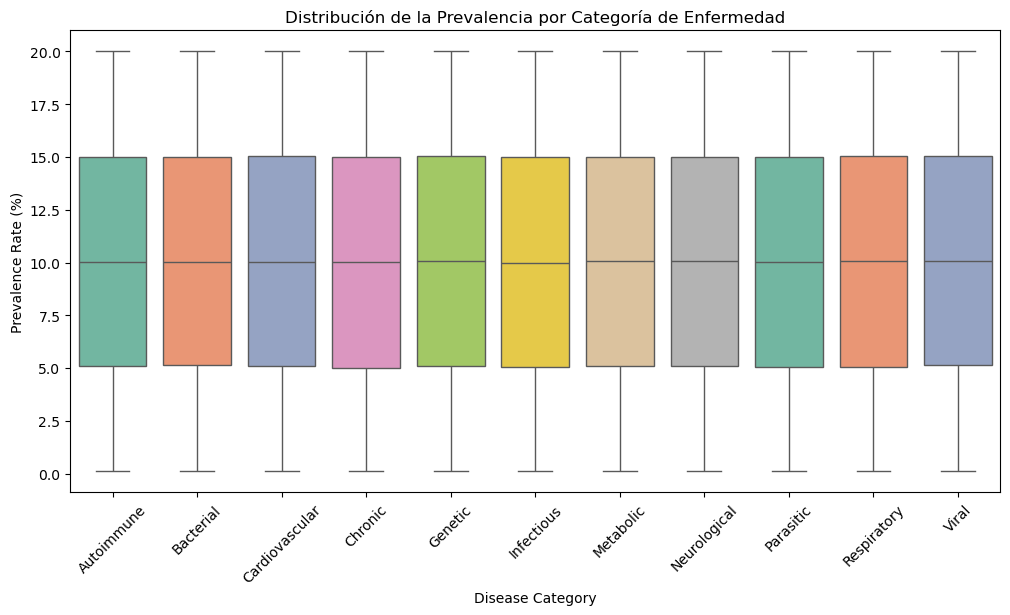

In [347]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x="Disease Category", y="Prevalence Rate (%)", palette="Set2")
plt.title("Distribución de la Prevalencia por Categoría de Enfermedad")
plt.xticks(rotation=45)
plt.show()

#### Visualizar qué países tienen mejor o peor infraestructura sanitaria usando un mapa de calor utilizando las columnas(Doctors per 1000 y Hospital Beds per 1000)

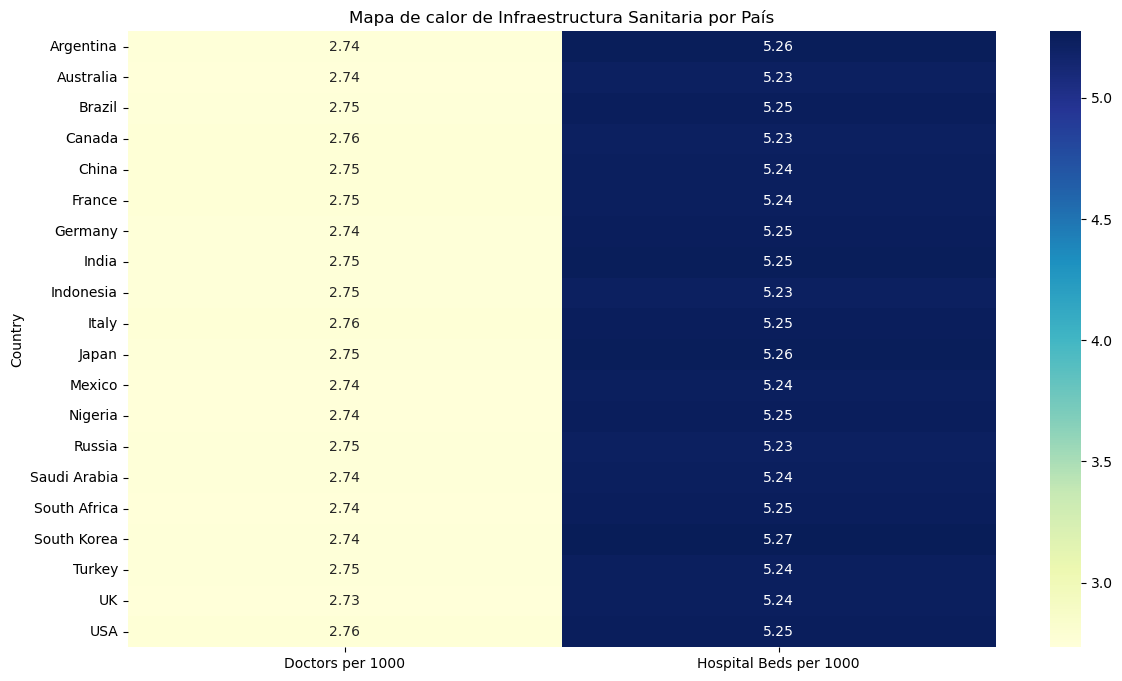

In [338]:
infra_data = df.groupby('Country')[['Doctors per 1000', 'Hospital Beds per 1000']].mean().reset_index()

plt.figure(figsize=(14, 8))
infra_pivot = infra_data.pivot_table(index='Country', values=['Doctors per 1000', 'Hospital Beds per 1000'])
sns.heatmap(infra_pivot, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Mapa de calor de Infraestructura Sanitaria por País")
plt.show()

#### Mortalidad por región y género, Comparar tasas de mortalidad entre géneros y países

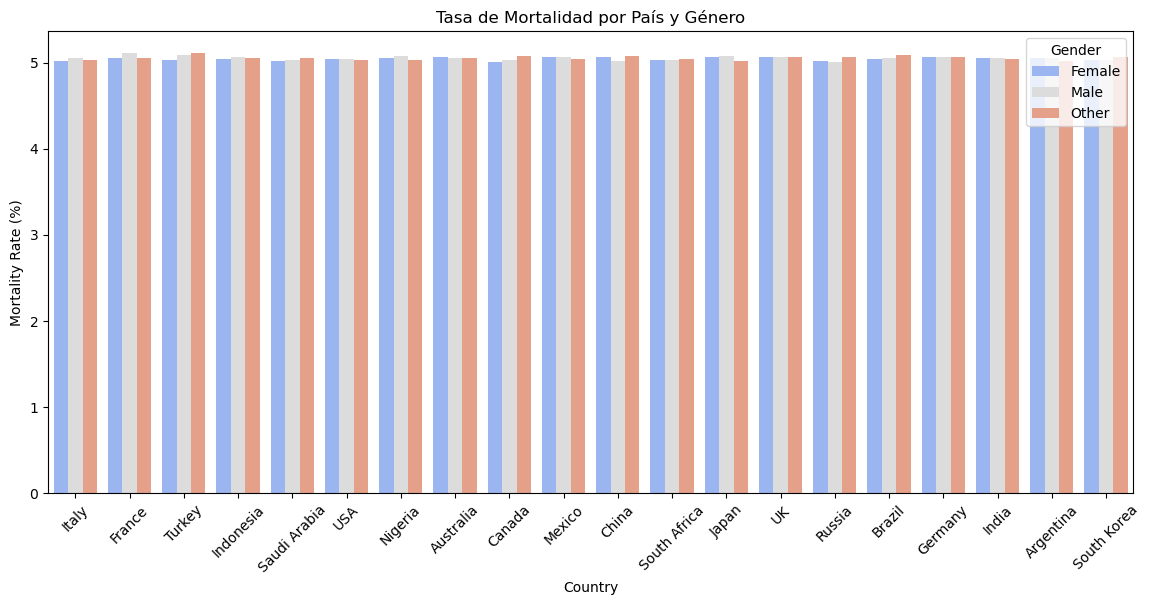

In [339]:
plt.figure(figsize=(14, 6))
sns.barplot(data=df, x="Country", y="Mortality Rate (%)", hue="Gender", ci=None, palette="coolwarm")
plt.title("Tasa de Mortalidad por País y Género")
plt.xticks(rotation=45)
plt.show()

#### Comparación de prevalencia y mortalidad por enfermedad, Visualizar qué enfermedades tienen mayor prevalencia y mortalidad

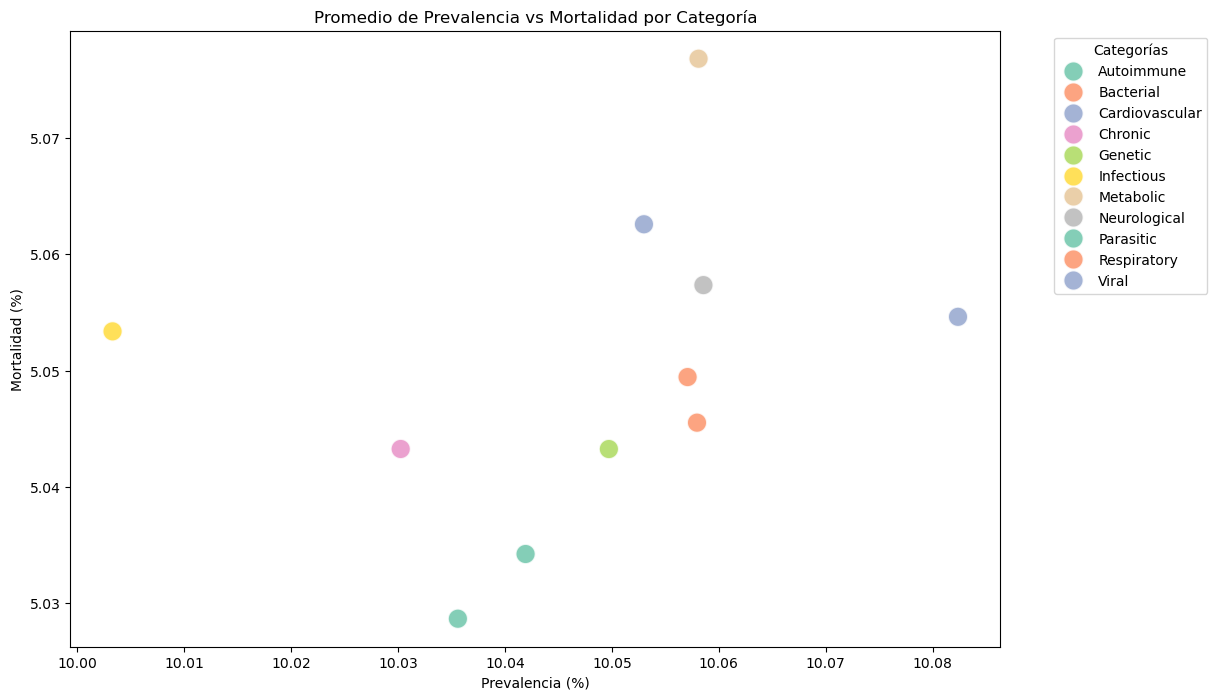

In [340]:
# Calcular el promedio por categoría
aggregated_df = df.groupby("Disease Category").agg(
    {"Prevalence Rate (%)": "mean", "Mortality Rate (%)": "mean"}
).reset_index()

# Gráfica con puntos promedio por categoría
plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=aggregated_df,
    x="Prevalence Rate (%)",
    y="Mortality Rate (%)",
    hue="Disease Category",
    s=200,
    alpha=0.8,
    palette="Set2",
)
plt.title("Promedio de Prevalencia vs Mortalidad por Categoría")
plt.xlabel("Prevalencia (%)")
plt.ylabel("Mortalidad (%)")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title="Categorías")
plt.show()


#### Distribución de Años de vida ajustados por discapacidad por País, para ver qué países tienen mayores cargas de enfermedad en términos de años de vida perdidos debido a enfermedades

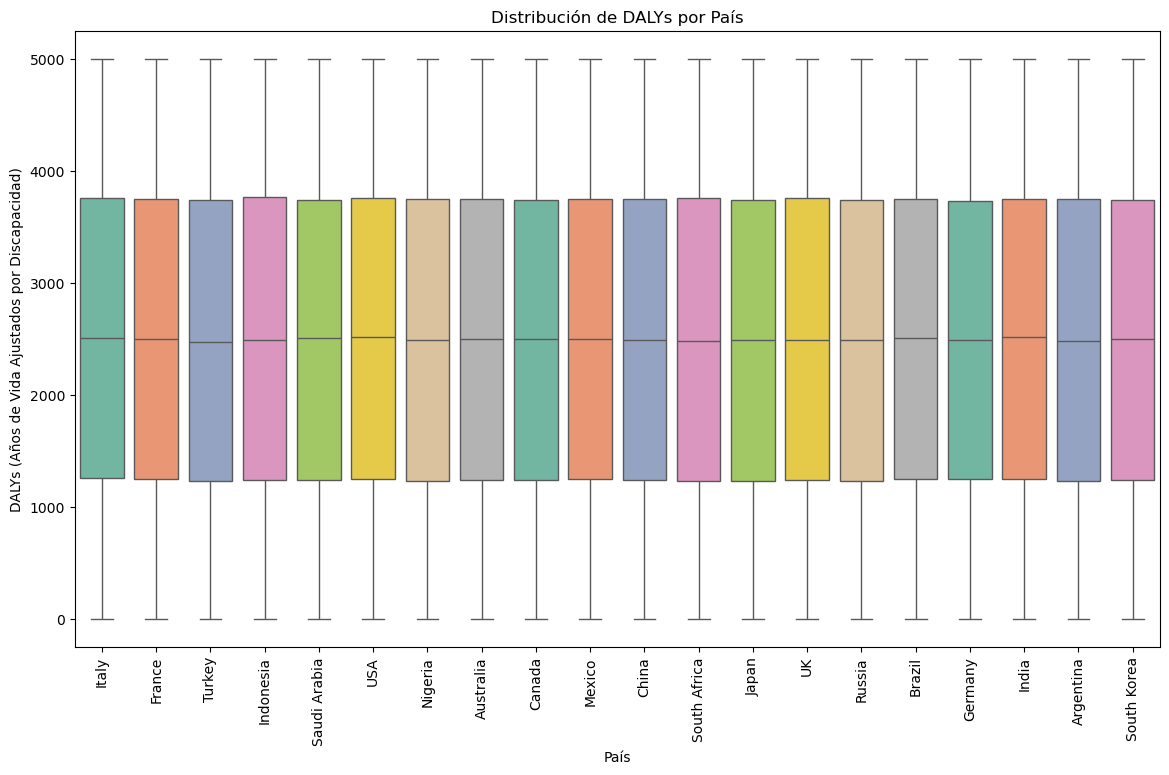

In [341]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=df, x="Country", y="DALYs", palette="Set2")
plt.title("Distribución de DALYs por País")
plt.xticks(rotation=90)
plt.ylabel("DALYs (Años de Vida Ajustados por Discapacidad)")
plt.xlabel("País")
plt.show()

#### Evolución de la Prevalencia de Enfermedades a lo largo de los Años

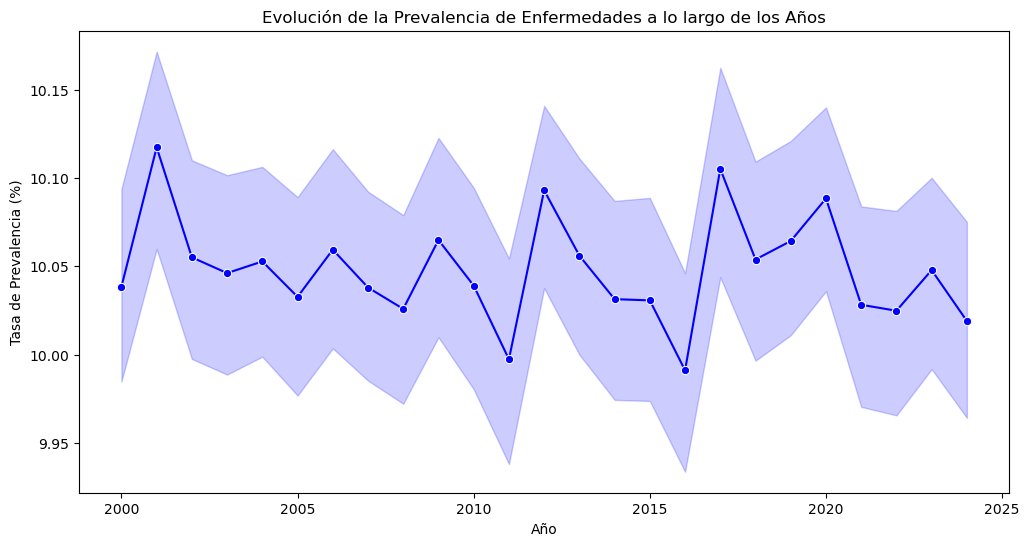

In [342]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Prevalence Rate (%)", marker="o", color="b")
plt.title("Evolución de la Prevalencia de Enfermedades a lo largo de los Años")
plt.xlabel("Año")
plt.ylabel("Tasa de Prevalencia (%)")
plt.show()


#### Mortalidad por Año, Analizar cómo ha evolucionado la mortalidad por año para evaluar si ha habido mejoras en las tasas de mortalidad a lo largo del tiempo


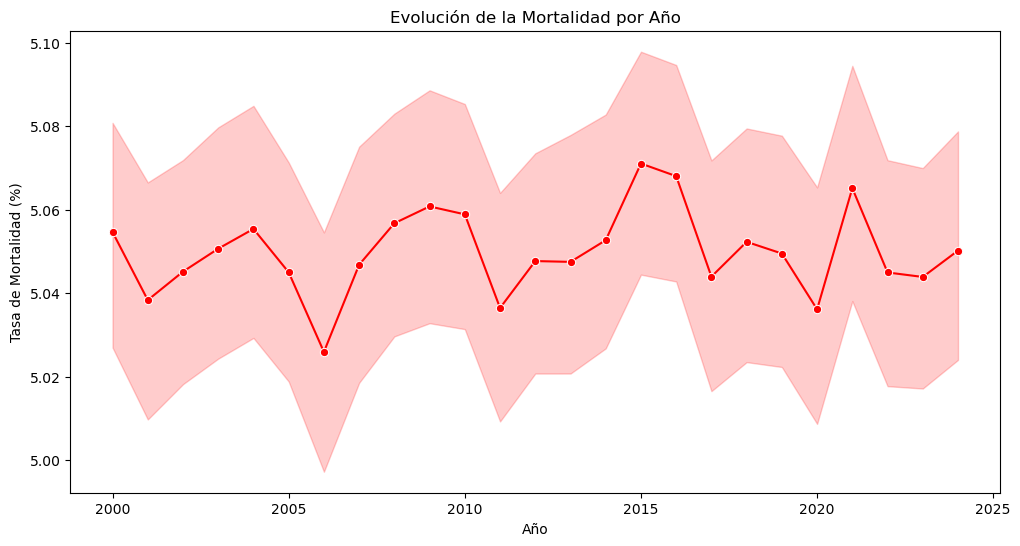

In [343]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Mortality Rate (%)", marker="o", color="r")
plt.title("Evolución de la Mortalidad por Año")
plt.xlabel("Año")
plt.ylabel("Tasa de Mortalidad (%)")
plt.show()


#### Analizar cómo ha evolucionado la carga de enfermedad (DALYs) en los últimos años

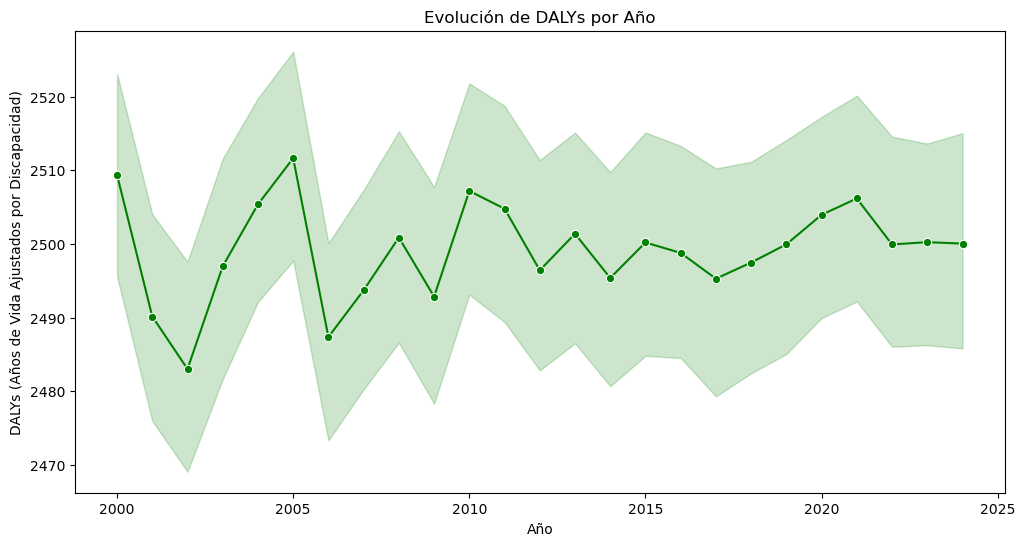

In [344]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="DALYs", marker="o", color="g")
plt.title("Evolución de DALYs por Año")
plt.xlabel("Año")
plt.ylabel("DALYs (Años de Vida Ajustados por Discapacidad)")
plt.show()


#### Acceso a la salud por Año, Examinar cómo ha evolucionado el acceso a la salud en el tiempo.


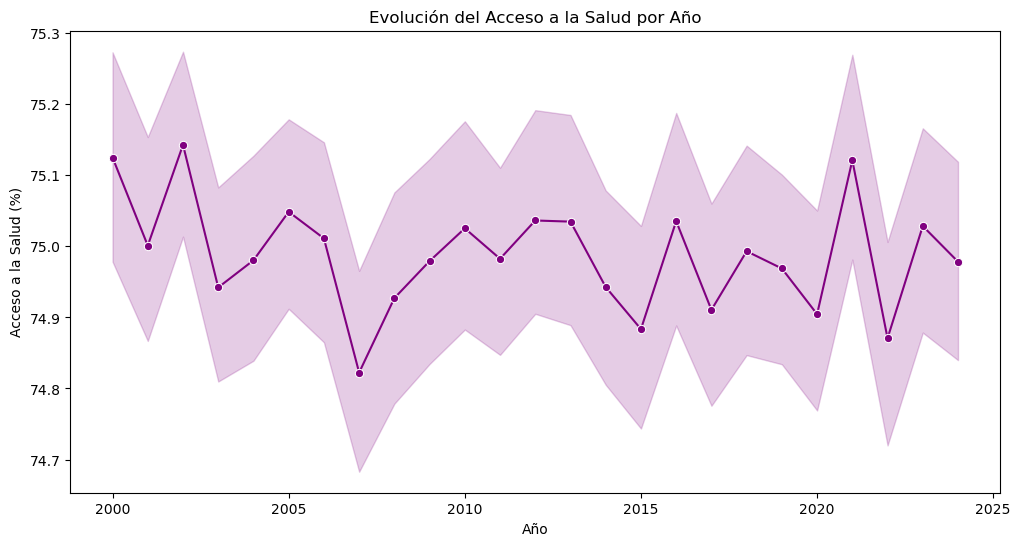

In [345]:
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x="Year", y="Healthcare Access (%)", marker="o", color="purple")
plt.title("Evolución del Acceso a la Salud por Año")
plt.xlabel("Año")
plt.ylabel("Acceso a la Salud (%)")
plt.show()
